# Aprendizado por Refoço
## Exercício 2: SARSA
### Gabriel Baruque (2012325)

In [1]:
import numpy as np
import ex2
from ex2 import *

help(ex2)

Help on module ex2:

NAME
    ex2 - ELE2761 Exercise 2: SARSA.

DESCRIPTION
    Implements the provided functionality to be used in your solution.
    
    FUNCTIONS
        check      -- Check SARSA class for errors.
        discretize -- Discretize and clip a continuous value.
        drawip     -- Draw inverted pendulum system.
        pendulum   -- Inverted pendulum system.
        test       -- Test trained SARSA object.
        train      -- Train SARSA object.

FUNCTIONS
    check(sarsa)
        Check SARSA class for basic errors.
    
    discretize(v, minv, maxv, numstates)
        Discretize and clip a continuous value.
        
        s = discretize(v, minv, maxv, numstates) discretizes v,
        from domain [minv, maxv] into a discrete state s in range
        [0, numstates-1].
    
    drawip(x, u=[])
        Draw inverted pendulum system.
        
        drawip(x) draws the inverted pendulum system at state x.
        
        drawip(x, u) additionally draws the actuat

Sanity checking SARSA class
...Parameters are within bounds
...Q value dimensionality OK
...State discretization is implemented
......Position discretization is within bounds
......Velocity discretization is within bounds
...Action execution is within bounds
...Reward observation is implemented
...Termination criterion is implemented
...Action selection is within bounds


AttributeError: 'SARSA' object has no attribute 'e'

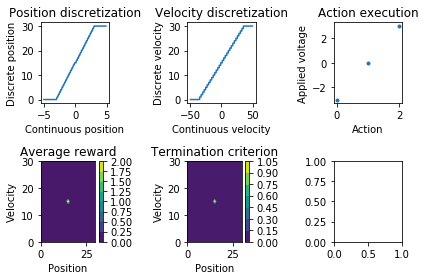

In [28]:
class SARSA():
    def __init__(self):
        self.epsilon = 0.05  # Random action rate
        self.alpha = 0.2     # Learning rate
        self.gamma = 0.99    # Discount rate
        self.pos_states = 31 # Position discretization (use odd values)
        self.vel_states = 31 # Velocity discretization (use odd values)
        self.actions = 3     # Action discretization
        self.trials = 1000   # Learning trials
        self.decay = 0.9     # Decay rate (use None for sarsa, and float for sarsa(lambda))

    def init_Q(self):
        """Initialize the Q table."""
        self.Q = np.full((self.pos_states,
                          self.vel_states,
                          self.actions),
                          10,
                          dtype=np.float32)
        pass

    def discretize_state(self, x):
        """Discretize state. Note: s[0] should be position, s[1] velocity."""
        
        pos = discretize(x[0], -pi, pi, self.pos_states)
        
        if x[1] < -12*pi:
            vel = -12*pi
        elif x[1] > 12*pi:
            vel = 12*pi
            
        vel = discretize(x[1], -12*pi, 12*pi, self.vel_states)
        
        return np.asarray([pos, vel])
        pass 

    def take_action(self, a):
        """Calculate the proper voltage for action a. This cannot exceed self.maxvoltage."""
        voltage = np.linspace(-self.maxvoltage, self.maxvoltage, self.actions)
        
        return voltage[a]
        pass

    def observe_reward(self, a, sP):
        """Calculate the reward for taking action a, resulting in state sP."""
        if sP[0] == (self.pos_states//2) and sP[1] == (self.vel_states//2):
            r = 2
        else:
            r = 0

        return r
        pass

    def is_terminal(self, sP):
        """Return 1 if state sP is terminal, 0 otherwise."""
        if sP[0] == (self.pos_states//2) and sP[1] == (self.vel_states//2):
            return 1
        else:
            return 0
        
        pass
    
    def execute_policy(self, s):
        """Select an action for state s using the epsilon-greedy algorithm."""
        chance = np.random.random()
        
        Q_state = np.copy(self.Q[s[0]][s[1]])
        
        if chance < self.epsilon: # chance to choose randomly
            aP = np.random.randint(self.actions)
            return aP
        else: # choose best action for Q_state, randomly between draws
            aP = np.argwhere(Q_state == np.max(Q_state)).flatten()
            aP = np.random.choice(aP)
            return aP
        
        pass
    
    def update_Q(self, s, a, r, sP, aP):
        """Implement the SARSA update rule."""
        
        if self.decay is None:
            Q_s_a = np.copy(self.Q[s[0]][s[1]][a])
            Q_sP_aP = np.copy(self.Q[sP[0]][sP[1]][aP])

            Q_s_a = Q_s_a + self.alpha*(r + self.gamma*Q_sP_aP - Q_s_a)

            self.Q[s[0]][s[1]][a] = np.copy(Q_s_a)
            
        else:
            e_temp = self.gamma * self.decay * np.copy(self.e)
            e_temp[s[0]][s[1]][a] = e_temp[s[0]][s[1]][a] + 1

            Q_temp = np.copy(self.Q)
            Q_s_a = Q_temp[s[0]][s[1]][a]
            Q_sP_aP = Q_temp[sP[0]][sP[1]][aP]

            Q_temp = Q_temp + self.alpha*(r + self.gamma*Q_sP_aP - Q_s_a)*e_temp

            self.Q = Q_temp
            self.e = e_temp
            
        pass
    
check(SARSA)

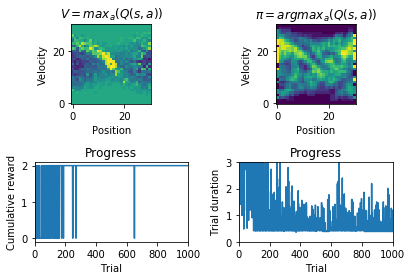

In [33]:
sarsa = SARSA()
train(sarsa)

In [34]:
test(sarsa)

# Questions Answers


## 1. Understanding the code
<br>

**Exercise 1.1**:<br>
The number of steps is calculated following the equation: **learner.simtime/learner.simstep**.<br>
Therefore, given that learner.simtime is set to **3** and learner.simstep is set to **0.03**, the total number of steps is **100**.
<br><br>

**Exercise 1.2**:<br>
The error reports that **epsilon**, the random action rate, is out of bounds. This parameter is set to **0**. This value is not correct because, if set like so, the algorithm would be greedy, and would rely only on exploitation. A good algorithm has to have a good trade-off between exploitation and **exploration** of actions, values or policy, to have a good short and long-term performance.

## 2. Setting the learning parameters
<br>


**Exercise 2.1**:<br>
The learning rate implements the exponencially weighted moving average. We want to keep it low, once setting it to a high value — inside the range \[0,1) — it is likely that the algorithm will bounce around the best result until it converge, and may even not converge ever.
<br><br>

**Exercise 2.2**:<br>
set the pos_states to 31
<br><br>


**Exercise 2.3**:<br>
set the vel_states to 31
<br><br>


**Exercise 2.4**:<br>
we nedd that much trials because the sample complexity is still high. In other words, we need a lot of samples to learn the task we want. Considering we set the amount of trials to 1000 and we have 100 steps per trial, we can update 10<sup>5</sup> times in 1000 trials.


## 3. Initialization
<br>

**Exercise 3.1**:<br>
The method chosen is optimistic . This choice was made to encourage exploration in algorithm first iterations.
<br><br>

**Exercise 3.2**:<br>
Q size is 31x31x3

## 4. Discretization
<br>

**Exercise 4.1**:<br>
Implemented position discretization
<br><br>

**Exercise 4.2**:<br>
Implemented velocity discretization
<br><br>

**Exercise 4.3**:<br>
The discretization function would have different limits and would become more "sensitive". In other words, the range that velocity could assume would be narrower, and the change between states would happen faster: it would be needed less change in velocity to change states.
<br><br>

**Exercise 4.4**:<br>
If we doubled the original Q with dimensions 31x31x3, we would have:

> Q_elements = (2\*31)x(2\*31)x(2\*3) = 62\*62\*6 = 23064

Doubling the resolution in each dimension would increase the number of elements by the factor of 2<sup>dim</sup>, in this case of 10 dimensions: **2<sup>10</sup>**
<br><br>

**Exercise 4.5**:<br>
The plots look ok, once the objective of discretization is to make a correlation between the continuous variable and its discrete counterpart
<br><br>

## 5. Reward and termination
<br>

**Exercise 5.1**:<br>
A function that only give reward when the pendulum is balanced at the top.
> if pendulum is balanced at the top: reward = 2 <br>
>else: reward = 0
<br><br>

**Exercise 5.2**:<br>
implemented
<br><br>

**Exercise 5.3**:<br>
we could give negative rewards every time we take action, other than "do nothing" (voltage 0)
<br><br>

**Exercise 5.4**:<br>
implemented

## 6. The policy and learning update
<br>

**Exercise 6.1**:<br>
implemented
<br><br>

**Exercise 6.2**:<br>
implemented


## 7. Make it work
<br>

**Exercise 7.1**:<br>
Results are similar
<br><br>


**Exercise 7.2:**<br>
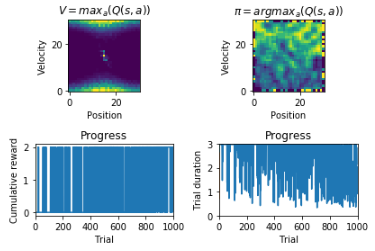
It can be seen in the cumulative reward chart that the reward keeps returning to zero. Also, in the trial duration chart, we observe that when gamma = 0.5, each trial is more time consuming than when gamma = 0.99. Decreasing the dicount factor will make the algorithm to consider rewards that are closer in time. Also, we can see a change in the value function graph, where only states near the goal state, and states far from it have bigger rewards.
<br><br>


**Exercise 7.3**:<br>
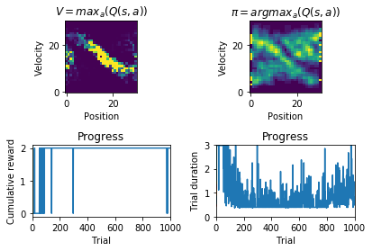
This happens because when using a discount rate of 0.9999, the algorithm consider rewards that will take more time to be seen, or that are less imediate. So, because of that, it will consider a "path" of rewards that leads to the maximum reward in the long-term, rather than a more immeadiate reward, like when discount rate is 0.5.



## 8. Speed it up
<br>

**Exercise 8.1**:<br>
created self.decay = 0.5
<br><br>


**Exercise 8.2**:<br>
When we use the sarsa() algorithm with discount rate 0.99 whe have a graph that looks like this: 
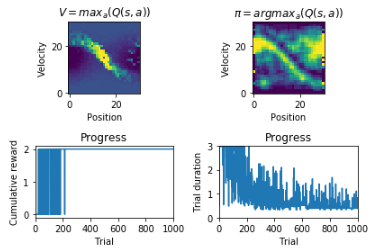

On the other hand, thats what the graph looks like when implementing sarsa(lambda) with decay rate = 0.5
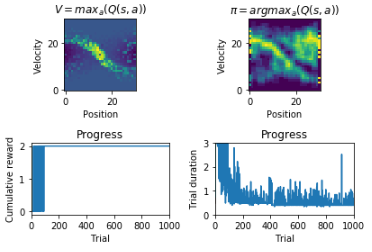

Comparing the two trial duration graphs, we see that the time consumed for each trial is overall lower in sarsa(lambda). Also, it seems that the sarsa(lambda) algorithm was capable of finding a consistently better reward earlier, around trial 100, while sarsa fount it arount trial 200.


<br><br>


**Exercise 8.3**:<br>
In this case, when lamnda = 0.9, we see a graph like:
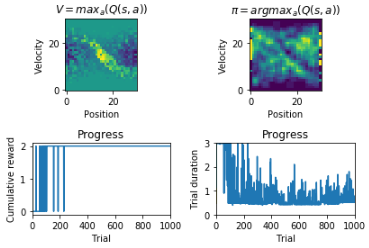
We observe that more areas of the V graph are rewarded more. This happens because when labda is higher, previously visited states are more credited, and as long as we implemented epsilon greedy policy, we tend to visit all states.



15